In [ ]:
# =========================
# 0. 라이브러리 / 재현성 설정
# =========================
import numpy as np
import tensorflow as tf

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# 문제(독립변수들) ---> 답(종속변수)
x = np.array([[0.0, 0.0],
              [0.0, 1.0],
              [1.0, 0.0],
              [1.0, 1.0]], dtype=np.float32)

In [ ]:
y = np.array([[-1.0],
              [ 1.0],
              [ 1.0],
              [ 1.0]], dtype=np.float32)

In [ ]:
n_input = 2 # 독립변수 갯수
n_output = 1 # 종속변수 갯수

In [ ]:
perceptron = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            units = n_output,
            activation = 'tanh',
            input_shape = (n_input, ),
            kernel_initializer="random_uniform",
            bias_initializer="zeros"
        )
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
perceptron.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=['mse'])

In [ ]:
history = perceptron.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step - loss: 0.9927 - mse: 0.9927
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7461 - mse: 0.7461
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6381 - mse: 0.6381
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5851 - mse: 0.5851
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.5529 - mse: 0.5529
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5297 - mse: 0.5297
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5111 - mse: 0.5111
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4949 - mse: 0.4949
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.4801 - mse: 0.4801
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4664 - mse: 0.4664
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4534 - mse: 0.4534
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4409 - mse: 0.4409
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/st

In [ ]:
# history.history['mse']

In [ ]:
res = perceptron.predict(x, verbose=2)

1/1 - 0s - 181ms/step


In [ ]:
res

array([[-0.81622434],
       [ 0.88631296],
       [ 0.88630587],
       [ 0.9992652 ]], dtype=float32)

In [ ]:
pred_class = np.where(res >= 0, 1.0, -1.0)
pred_class

array([[-1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [ ]:
W, b = perceptron.layers[0].get_weights()
print("\n=== Learned weights (W) and bias (b) ===")
print("W:\n", W)
print("b:\n", b)


=== Learned weights (W) and bias (b) ===
W:
 [[2.5498314]
 [2.5498645]]
b:
 [-1.1453996]


**파이토치 비교해보자.**

* *손실함수*
* 옵티마이저
* 활성화함수

# 텐서가 되어야함.
## 2차원 텐서가 되어야함.

---


```

import pytorch

```

[파이토치 참고사이트](https://pytorch.org/)
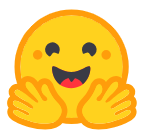

<img src="https://cdn.pixabay.com/photo/2019/08/12/13/45/ice-cream-4401300_640.jpg" width="300" height="300">

<hr>

🍎 🍊 ⏰


<table>
<tr>
<td>감</td><td>자</td>
</tr>
</table>


In [ ]:

import torch
import torch.nn as nn

# =========================
# 1. 재현성(옵션이지만 권장)
# =========================
torch.manual_seed(42)

In [ ]:
x = torch.tensor([[0.0, 0.0],
                  [0.0, 1.0],
                  [1.0, 0.0],
                  [1.0, 1.0]], dtype=torch.float32)

y = torch.tensor([[-1.0],
                  [ 1.0],
                  [ 1.0],
                  [ 1.0]], dtype=torch.float32)

In [ ]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Tanh()
)


In [ ]:
with torch.no_grad():
    model[0].bias.zero_()

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
for epoch in range(500):
    pred = model(x)                 # forward
    loss = criterion(pred, y)       # loss

    optimizer.zero_grad()           # grad 초기화
    loss.backward()                 # backward
    optimizer.step()                # update

In [ ]:
with torch.no_grad():
    res = model(x)
    pred_class = torch.where(res >= 0, torch.tensor(1.0), torch.tensor(-1.0))

In [ ]:
print(res)

tensor([[-0.8196],
        [ 0.8884],
        [ 0.8884],
        [ 0.9993]])


In [ ]:
W = model[0].weight.data   # shape (1,2)
b = model[0].bias.data     # shape (1,)
print("\n=== Learned weights (W) and bias (b) ===")
print("W:\n", W)
print("b:\n", b)


=== Learned weights (W) and bias (b) ===
W:
 tensor([[2.5699, 2.5699]])
b:
 tensor([-1.1557])
